In [1]:
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import gzip
%load_ext jupyter_spaces

# Download Files

In [10]:
%%bash
set -e 
if ! [ -d "./downloads/10X-Illumina-processed/" ]; then 
    mkdir -p "./downloads"
    cd "./downloads"
    wget -c "https://crc-atlas.s3.amazonaws.com/data.tar.gz"; 
    tar -xzvf "data.tar.gz"
fi

--2023-11-06 01:42:26--  https://crc-atlas.s3.amazonaws.com/data.tar.gz
Resolving crc-atlas.s3.amazonaws.com (crc-atlas.s3.amazonaws.com)... 52.216.77.148, 52.216.214.153, 52.217.122.201, ...
Connecting to crc-atlas.s3.amazonaws.com (crc-atlas.s3.amazonaws.com)|52.216.77.148|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



10X-Illumina-processed/
10X-Illumina-processed/expr.combined.TPM.h5ad
10X-Illumina-processed/expr.TPM.h5ad
10X-PacBio-processed/
10X-PacBio-processed/PacBio-isoform_counts_matrix_ad.h5ad
10X-PacBio-processed/PB_IL_fc.csv
10X-PacBio-processed/isoform_perc.csv
epithelial_lineage_analysis/
epithelial_lineage_analysis/cds_epi.rds
epithelial_lineage_analysis/enterocyte_branch/
epithelial_lineage_analysis/enterocyte_branch/subcds.rds
epithelial_lineage_analysis/best4_branch/
epithelial_lineage_analysis/best4_branch/subcds.rds
epithelial_lineage_analysis/goblet_branch/
epithelial_lineage_analysis/goblet_branch/subcds.rds
neoantigen_candidates/
neoantigen_candidates/tcga_coad_isoform_level_patient_agg.csv
neoantigen_candidates/isoform_table.csv
neoantigen_candidates/kmer_table.csv
neoantigen_candidates/kmer_HLA_table.csv


# Visualize Cell Clusters

Open the downloaded file

In [11]:
adata_fp="./downloads/10X-Illumina-processed/expr.combined.TPM.h5ad"
with open(adata_fp,'rb') as f:
    adata=ad.read_h5ad(f)

This plot shows the cell clusters used in this study

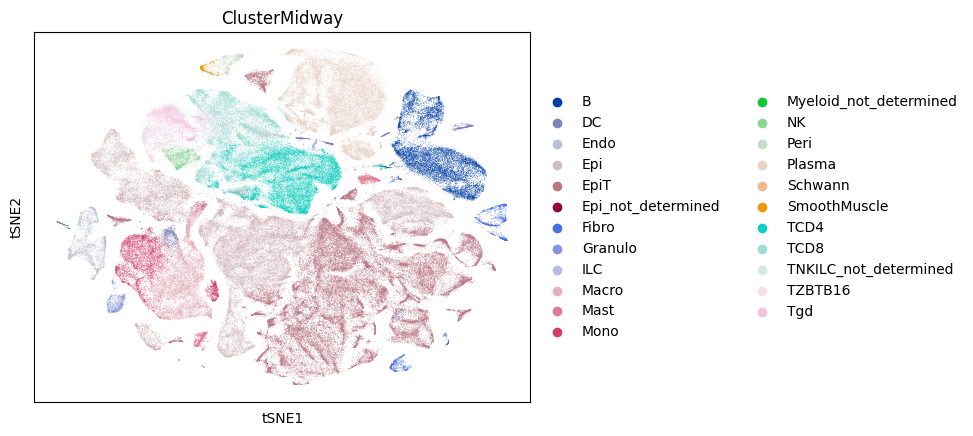

In [3]:
sc.pl.tsne(adata,color="ClusterMidway")

# Visualize Integration

This plot shows the integration of in-house data with c295

In [4]:
adata.obs["integration"]=adata.obs.apply(lambda row: "c295" if row["sample_source"]=="bc295" else row["condition"],axis=1)

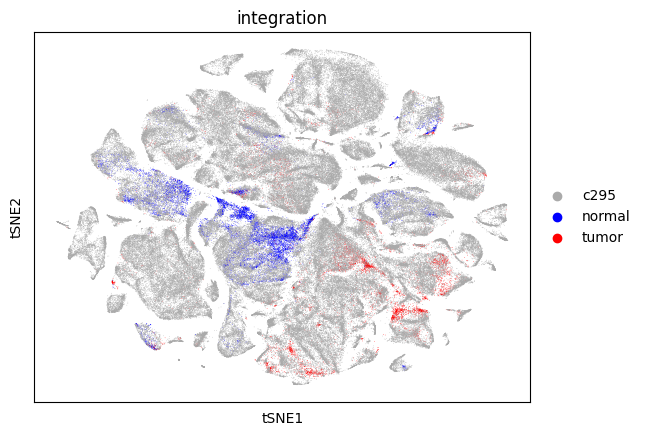

In [5]:
sc.pl.tsne(adata,color="integration",palette={"c295":"#aaaaaa","normal":"blue","tumor":"red"},size=1,alpha=0.8)

# Visualize Proportion

This plot shows the proportion of cell types in each sample

In [6]:
adata_obs_sub=adata.obs.query("sample_source=='in-house'").copy()
adata_obs_sub["library_id_short"]=adata_obs_sub["library_id_short"].astype(str)
plot_data=pd.pivot_table(
    adata_obs_sub,
    index="library_id_short",
    columns="ClusterMidway",
    aggfunc='size',
    fill_value=0
)
plot_data=plot_data/plot_data.values.sum(axis=1,keepdims=True)

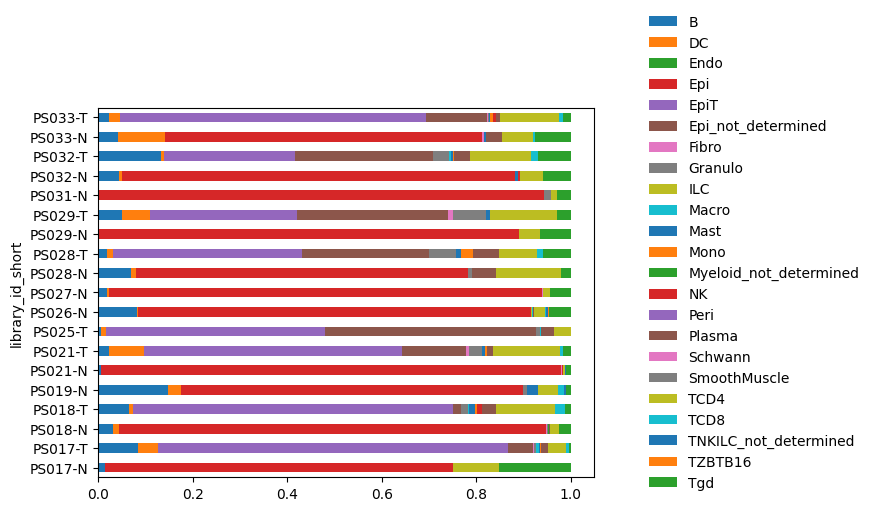

In [7]:
ax=plot_data.plot(kind="barh",stacked=True)
ax.legend(frameon=False,loc=(1.1,-0.05))